In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd

train = pd.read_csv("./house_data/train.csv")
test = pd.read_csv("./house_data/test.csv")
sub = pd.read_csv("./house_data/sample_submission.csv")

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6555 entries, 0 to 6554
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6555 non-null   int64  
 1   date           6555 non-null   object 
 2   bedrooms       6555 non-null   int64  
 3   bathrooms      6555 non-null   float64
 4   sqft_living    6555 non-null   int64  
 5   sqft_lot       6555 non-null   int64  
 6   floors         6555 non-null   float64
 7   waterfront     6555 non-null   int64  
 8   view           6555 non-null   int64  
 9   condition      6555 non-null   int64  
 10  grade          6555 non-null   int64  
 11  sqft_above     6555 non-null   int64  
 12  sqft_basement  6555 non-null   int64  
 13  yr_built       6555 non-null   int64  
 14  yr_renovated   6555 non-null   int64  
 15  zipcode        6555 non-null   int64  
 16  lat            6555 non-null   float64
 17  long           6555 non-null   float64
 18  sqft_liv

In [7]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [8]:
test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15208,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
1,15209,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
2,15210,20150124T000000,4,3.00,2950,5000,2.0,0,3,3,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
3,15211,20141205T000000,2,1.00,1200,9850,1.0,0,0,4,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095
4,15212,20140514T000000,4,1.75,1620,4980,1.0,0,0,4,7,860,760,1947,0,98133,47.7025,-122.341,1400,4980


In [9]:
test.tail()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6550,21758,20141002T000000,4,2.75,2770,3852,2.0,0,0,3,8,2770,0,2014,0,98178,47.5001,-122.232,1810,5641
6551,21759,20150416T000000,3,2.25,1190,1200,3.0,0,0,3,8,1190,0,2008,0,98103,47.6542,-122.346,1180,1224
6552,21760,20141015T000000,5,3.75,4470,8088,2.0,0,0,3,11,4470,0,2008,0,98004,47.6321,-122.200,2780,8964
6553,21761,20150126T000000,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
6554,21762,20140623T000000,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


In [10]:
train.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15030,15030,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
15031,15031,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
15032,15032,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
15033,15033,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
15034,15034,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [15]:
train.shape

(15035, 21)

In [16]:
test.shape

(6555, 20)

In [19]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [26]:
X_all = train.drop(['price'], axis=1)
y=train['price']

print(X_all.shape, y.shape)

(15035, 20) (15035,)


In [27]:
X_all.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [28]:
train.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.020899,0.010520,0.104030,0.041725,-0.034077,0.182848,-0.011775,-0.024360,-0.101618,0.078622,0.073086,-0.050634,0.202477,-0.029810,-0.005761,0.002588,0.014757,0.029248,-0.032269
price,0.020899,1.000000,0.323672,0.525479,0.702899,0.096793,0.262588,0.265738,0.400806,0.039740,0.667211,0.608577,0.322218,0.047290,0.140808,-0.051498,0.301604,0.023547,0.586419,0.086384
bedrooms,0.010520,0.323672,1.000000,0.530548,0.596974,0.033475,0.189532,-0.004819,0.085703,0.034885,0.375286,0.494867,0.315183,0.158799,0.022729,-0.162081,-0.011190,0.135802,0.407394,0.027242
bathrooms,0.104030,0.525479,0.530548,1.000000,0.755853,0.089308,0.508649,0.075452,0.187488,-0.125907,0.666278,0.688255,0.282642,0.503964,0.065423,-0.207500,0.018110,0.227669,0.573541,0.088120
sqft_living,0.041725,0.702899,0.596974,0.755853,1.000000,0.176500,0.363193,0.108137,0.282821,-0.054213,0.762543,0.878736,0.434017,0.315927,0.064893,-0.200745,0.051609,0.245429,0.760271,0.184176
sqft_lot,-0.034077,0.096793,0.033475,0.089308,0.176500,1.000000,0.001535,0.025584,0.080441,-0.002099,0.119906,0.186242,0.017818,0.058686,-0.001451,-0.127709,-0.082234,0.227451,0.147562,0.728458
floors,0.182848,0.262588,0.189532,0.508649,0.363193,0.001535,1.000000,0.031159,0.034511,-0.261016,0.462598,0.529476,-0.239350,0.490436,0.009752,-0.059107,0.049004,0.126983,0.287125,-0.010287
waterfront,-0.011775,0.265738,-0.004819,0.075452,0.108137,0.025584,0.031159,1.000000,0.389669,0.011613,0.088061,0.081968,0.071576,-0.026523,0.104168,0.028632,-0.014772,-0.037922,0.091810,0.028255
view,-0.024360,0.400806,0.085703,0.187488,0.282821,0.080441,0.034511,0.389669,1.000000,0.045255,0.247924,0.172693,0.265880,-0.061670,0.107605,0.089247,0.005285,-0.073151,0.278267,0.076501
condition,-0.101618,0.039740,0.034885,-0.125907,-0.054213,-0.002099,-0.261016,0.011613,0.045255,1.000000,-0.143599,-0.152856,0.175064,-0.366590,-0.062342,0.001106,-0.015974,-0.110742,-0.091407,-0.003873


In [29]:
### 상관계수
# -1~1값의 범위를 갖는다
#절대값을 취해서 1에 가까우면 가까울수록 상관계수가 높은 것임


In [30]:
train.corr()['price']

id               0.020899
price            1.000000
bedrooms         0.323672
bathrooms        0.525479
sqft_living      0.702899
sqft_lot         0.096793
floors           0.262588
waterfront       0.265738
view             0.400806
condition        0.039740
grade            0.667211
sqft_above       0.608577
sqft_basement    0.322218
yr_built         0.047290
yr_renovated     0.140808
zipcode         -0.051498
lat              0.301604
long             0.023547
sqft_living15    0.586419
sqft_lot15       0.086384
Name: price, dtype: float64

In [32]:
# bedrooms, bathrooms, sqft_living, view, grade

In [33]:
sel = ['bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade']
X = X_all[sel]
y = train['price']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)

In [36]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [37]:
sel = ['bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade']
X = X_all[sel]
y = train['price']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)

In [38]:
# knn
model=KNeighborsRegressor()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.6889315379646785
0.49202844461306783


In [40]:
# 랜덤포레스트
model=RandomForestRegressor()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8994592726202131
0.5738818147573674


In [41]:
model=GradientBoostingRegressor()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7176281374755552
0.641534605510452


In [45]:
lr_rate = [0.1, 0.05, 0.01, 0.005, 0.001]
depth_num=range(1, 15, 1)

for lr in lr_rate:
    for num in depth_num:
        model=GradientBoostingRegressor(random_state=0).fit(X_train, y_train)
        
        print("learning rate, max_depth", lr, num)
        print(model.score(X_train, y_train))
        print(model.score(X_test, y_test))
        print()

learning rate, max_depth 0.1 1
0.7176281374755552
0.6417758204066646

learning rate, max_depth 0.1 2
0.7176281374755552
0.6417758204066646

learning rate, max_depth 0.1 3
0.7176281374755552
0.6417758204066646

learning rate, max_depth 0.1 4
0.7176281374755552
0.6417758204066646

learning rate, max_depth 0.1 5
0.7176281374755552
0.6417758204066646

learning rate, max_depth 0.1 6
0.7176281374755552
0.6417758204066646

learning rate, max_depth 0.1 7
0.7176281374755552
0.6417758204066646

learning rate, max_depth 0.1 8
0.7176281374755552
0.6417758204066646

learning rate, max_depth 0.1 9
0.7176281374755552
0.6417758204066646

learning rate, max_depth 0.1 10
0.7176281374755552
0.6417758204066646

learning rate, max_depth 0.1 11
0.7176281374755552
0.6417758204066646

learning rate, max_depth 0.1 12
0.7176281374755552
0.6417758204066646

learning rate, max_depth 0.1 13
0.7176281374755552
0.6417758204066646

learning rate, max_depth 0.1 14
0.7176281374755552
0.6417758204066646

learning rate, 

In [47]:
model = GradientBoostingRegressor(max_depth=4, learning_rate=0.1).fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7414152354839403
0.6458636352994083


In [48]:
model.feature_importances_

array([0.01564172, 0.04622712, 0.39802302, 0.06212102, 0.47798712])

In [51]:
# model : 모델
# n_features : feature(변수의 개수)
# feature_names : 특성의 이름

def plot_feature_important_up(model, n_features, feature_names):
  imp = model.feature_importances_     # feature의 중요도 
  plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
  plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
  plt.xlabel("feature importance")   # x축 레이블(제목)
  plt.ylabel("feature")              # y축 제목
  plt.ylim(-1, n_features)           # y축의 범위 지정 

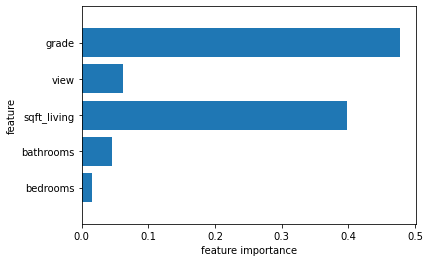

In [52]:
feature_names = sel   #  선택된 피처의 이름
n_features = X.shape[1]  # 선택된 피처의 개수
plot_feature_important_up(model, n_features, feature_names) # 피처의 중요도 확인

In [109]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

In [110]:
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                       stratify=cancer.target, random_state=0)

In [112]:
model=KNeighborsRegressor()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8534944526888559
0.7157987421383647


In [113]:
model = GradientBoostingClassifier(random_state=0, max_depth=1)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9953051643192489
0.965034965034965


In [114]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.951048951048951


In [115]:
lr_rate = [0.1, 0.05, 0.01, 0.005, 0.001]
depth_num = range(1, 15, 1)

for lr in lr_rate:
    for num in depth_num:
        model = GradientBoostingClassifier(learning_rate=lr, max_depth=num, random_state=0).fit(X_train, y_train)

        print("learning rate, max_depth ", lr, num)
        print(model.score(X_train, y_train))
        print(model.score(X_test, y_test))
        print()

learning rate, max_depth  0.1 1
0.9953051643192489
0.965034965034965

learning rate, max_depth  0.1 2
1.0
0.9370629370629371

learning rate, max_depth  0.1 3
1.0
0.958041958041958

learning rate, max_depth  0.1 4
1.0
0.9370629370629371

learning rate, max_depth  0.1 5
1.0
0.9230769230769231

learning rate, max_depth  0.1 6
1.0
0.9300699300699301

learning rate, max_depth  0.1 7
1.0
0.9300699300699301

learning rate, max_depth  0.1 8
1.0
0.9300699300699301

learning rate, max_depth  0.1 9
1.0
0.9300699300699301

learning rate, max_depth  0.1 10
1.0
0.9300699300699301

learning rate, max_depth  0.1 11
1.0
0.916083916083916

learning rate, max_depth  0.1 12
1.0
0.916083916083916

learning rate, max_depth  0.1 13
1.0
0.9230769230769231

learning rate, max_depth  0.1 14
1.0
0.9300699300699301

learning rate, max_depth  0.05 1
0.9835680751173709
0.951048951048951

learning rate, max_depth  0.05 2
1.0
0.9370629370629371

learning rate, max_depth  0.05 3
1.0
0.958041958041958

learning rate, m

In [116]:
# n_features : 변수의 개수
# feature_names : 변수의 이름 
# model : 모델 
def plot_feature_important_up(model, n_features, feature_names):
  imp = model.feature_importances_     # feature의 중요도 
  plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
  plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
  plt.xlabel("feature importance")   # x축 레이블(제목)
  plt.ylabel("feature")              # y축 제목
  plt.ylim(-1, n_features)           # y축의 범위 지정 

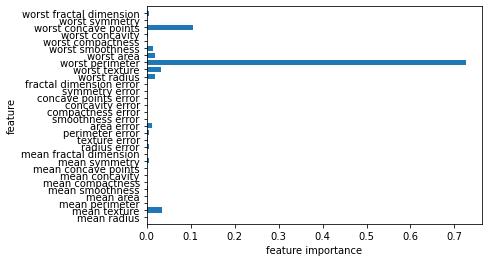

In [117]:
feature_num = X_train.shape[1]
feature_names = cancer.feature_names

plot_feature_important_up(model, feature_num, feature_names)

In [119]:
import pandas as pd
data ={"eng" : ["b", "c", "a", "d"]}
df=pd.DataFrame(data)
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,eng
0,b
1,c
2,a
3,d


In [120]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [121]:
en_x=LabelEncoder()
df['eng_label'] = en_x.fit_transform(df['eng'])
df

,eng,eng_label
0,b,1
1,c,2
2,a,0
3,d,3


In [123]:
df['eng_label'].values

array([1, 2, 0, 3])

In [127]:
onehot = OneHotEncoder()
val = df['eng_label'].values.reshape(-1, 1)
y = onehot.fit_transform(val).toarray()
y

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [131]:
onehot_val = pd.DataFrame(y, dtype=int)
df_new = pd.concat([df, onehot_val], axis = 1)
df_new

,eng,eng_label,0,1,2,3
0,b,1,0,1,0,0
1,c,2,0,0,1,0
2,a,0,1,0,0,0
3,d,3,0,0,0,1


In [132]:
data = { "회사명": ["MS","Apple", "Google", "Google"]}
df=pd.DataFrame(data)
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,회사명
0,MS
1,Apple
2,Google
3,Google


In [133]:
df['회사명']

0        MS
1     Apple
2    Google
3    Google
Name: 회사명, dtype: object

In [136]:
en_x=LabelEncoder()
df['회사_label'] = en_x.fit_transform(df['회사명'])
df

,회사명,회사_label
0,MS,2
1,Apple,0
2,Google,1
3,Google,1


In [137]:
df['회사명'].values

array(['MS', 'Apple', 'Google', 'Google'], dtype=object)

In [138]:
onehot = OneHotEncoder()
val = df['회사_label'].values.reshape(-1, 1)
y = onehot.fit_transform(val).toarray()
y

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [139]:
onehot_val = pd.DataFrame(y, dtype=int)
df_new = pd.concat([df, onehot_val], axis = 1)
df_new

,회사명,회사_label,0,1,2
0,MS,2,0,0,1
1,Apple,0,1,0,0
2,Google,1,0,1,0
3,Google,1,0,1,0


In [141]:
import pandas as pd
import os

In [142]:
demo_df = pd.DataFrame({"범주형_feature":['양말', '여우', '양말', '상자']})
display(demo_df)

,범주형_feature
0,양말
1,여우
2,양말
3,상자


In [143]:
onehot = pd.get_dummies(demo_df)
onehot

,범주형_feature_상자,범주형_feature_양말,범주형_feature_여우
0,0,1,0
1,0,0,1
2,0,1,0
3,1,0,0


In [144]:
df = pd.concat([demo_df, onehot], axis=1)
df

,범주형_feature,범주형_feature_상자,범주형_feature_양말,범주형_feature_여우
0,양말,0,1,0
1,여우,0,0,1
2,양말,0,1,0
3,상자,1,0,0


In [145]:
demo_df = pd.DataFrame({"회사명": ["MS","Apple", "Google", "Google"]})
display(demo_df)

,회사명
0,MS
1,Apple
2,Google
3,Google


In [146]:
onehot = pd.get_dummies(demo_df)
onehot

,회사명_Apple,회사명_Google,회사명_MS
0,0,0,1
1,1,0,0
2,0,1,0
3,0,1,0


In [147]:
df = pd.concat([demo_df, onehot], axis=1)
df

,회사명,회사명_Apple,회사명_Google,회사명_MS
0,MS,0,0,1
1,Apple,1,0,0
2,Google,0,1,0
3,Google,0,1,0
